# Orbit Determination
In this notebook, we solve a simple orbit determination problem of estimating an orbit to some sample GNSS data.

In [1]:
import pandas as pd

import plotly.express as px

import numpy as np

from ostk.physics import Environment
from ostk.physics.coordinate import Frame
from ostk.physics.environment.object.celestial import Earth
from ostk.physics.environment.object.celestial import Moon
from ostk.physics.environment.object.celestial import Sun

from ostk.astrodynamics.estimator import OrbitDeterminationSolver
from ostk.astrodynamics.trajectory import State
from ostk.astrodynamics.solver import LeastSquaresSolver
from ostk.astrodynamics.trajectory.state import NumericalSolver
from ostk.astrodynamics.dataframe import generate_states_from_dataframe
from ostk.astrodynamics.converters import coerce_to_datetime

## Setup environment
We setup an environment with Earth as the central celestial object
- EGM96 10x10
- No atmospheric drag
- Third body perturbations from the Sun and the Moon

In [2]:
environment: Environment = Environment(
    central_celestial_object=Earth.EGM96(10, 10),
    objects=[Moon.default(), Sun.default()]
)

In [3]:
orbit_determination_solver: OrbitDeterminationSolver = OrbitDeterminationSolver(
    environment=environment,
    numerical_solver=NumericalSolver.default(),
    solver=LeastSquaresSolver.default(),
)

## Load sample data
Sample GNSS telemetry in the ITRF frame

In [4]:
gnss_data = pd.DataFrame(
  [
    {
      "Timestamp": "2022-09-10T00:00:00.537",
      "r_ITRF_x": -1016988.4,
      "v_ITRF_x": -6440.7055664062,
      "v_ITRF_z": -1946.8566894531,
      "r_ITRF_y": -1698967.28,
      "v_ITRF_y": -3691.6062011719,
      "r_ITRF_z": 6597796.2199999997
    },
    {
      "Timestamp": "2022-09-10T00:01:00.537",
      "r_ITRF_x": -1401893.8,
      "v_ITRF_x": -6384.5068359375,
      "v_ITRF_z": -2423.8815917969,
      "r_ITRF_y": -1914926.0600000001,
      "v_ITRF_y": -3504.4743652344,
      "r_ITRF_z": 6466623.4699999997
    },
    {
      "Timestamp": "2022-09-10T00:02:00.537",
      "r_ITRF_x": -1782540.96,
      "v_ITRF_x": -6298.8227539062,
      "v_ITRF_z": -2890.572265625,
      "r_ITRF_y": -2119207.3999999999,
      "v_ITRF_y": -3302.5617675781,
      "r_ITRF_z": 6307130.9400000004
    },
    {
      "Timestamp": "2022-09-10T00:04:59.537",
      "r_ITRF_x": -2875526.4500000002,
      "v_ITRF_x": -5870.8212890625,
      "v_ITRF_z": -4200.7197265625,
      "r_ITRF_y": -2651245.2000000002,
      "v_ITRF_y": -2624.5534667969,
      "r_ITRF_z": 5670406.9900000002
    },
    {
      "Timestamp": "2022-09-10T00:05:00.537",
      "r_ITRF_x": -2881395.6899999999,
      "v_ITRF_x": -5867.7138671875,
      "v_ITRF_z": -4207.5874023438,
      "r_ITRF_y": -2653867.7200000002,
      "v_ITRF_y": -2620.478515625,
      "r_ITRF_z": 5666202.8399999999
    },
    {
      "Timestamp": "2022-09-10T00:06:00.537",
      "r_ITRF_x": -3227593.21,
      "v_ITRF_x": -5667.6708984375,
      "v_ITRF_z": -4612.5078125,
      "r_ITRF_y": -2803680.5899999999,
      "v_ITRF_y": -2371.7475585938,
      "r_ITRF_z": 5401503.0199999996
    },
    {
      "Timestamp": "2022-09-10T00:07:00.537",
      "r_ITRF_x": -3560975.0099999998,
      "v_ITRF_x": -5440.666015625,
      "v_ITRF_z": -4997.3012695312,
      "r_ITRF_y": -2938306.2599999998,
      "v_ITRF_y": -2114.4851074219,
      "r_ITRF_z": 5113105.0499999998
    },
    {
      "Timestamp": "2022-09-10T00:11:18.537",
      "r_ITRF_x": -4811601.4199999999,
      "v_ITRF_x": -4181.2783203125,
      "v_ITRF_z": -6383.759765625,
      "r_ITRF_y": -3334481.5099999998,
      "v_ITRF_y": -943.7043457031,
      "r_ITRF_z": 3634961.1600000001
    },
    {
      "Timestamp": "2022-09-10T00:12:00.537",
      "r_ITRF_x": -4982122.6600000001,
      "v_ITRF_x": -3937.1262207031,
      "v_ITRF_z": -6563.2080078125,
      "r_ITRF_y": -3370012.2599999998,
      "v_ITRF_y": -748.1647949219,
      "r_ITRF_z": 3363025.0299999998
    },
    {
      "Timestamp": "2022-09-10T00:13:00.537",
      "r_ITRF_x": -5207480.3899999997,
      "v_ITRF_x": -3571.6452636719,
      "v_ITRF_z": -6795.056640625,
      "r_ITRF_y": -3406514.5600000001,
      "v_ITRF_y": -468.665222168,
      "r_ITRF_z": 2962129.3199999998
    },
    {
      "Timestamp": "2022-09-10T00:14:33.537",
      "r_ITRF_x": -5511988.8300000001,
      "v_ITRF_x": -2970.1599121094,
      "v_ITRF_z": -7095.07421875,
      "r_ITRF_y": -3430052.2799999998,
      "v_ITRF_y": -38.3974189758,
      "r_ITRF_z": 2315670.1800000002
    }
  ]
)

In [5]:
observations: list[State] = generate_states_from_dataframe(gnss_data, reference_frame=Frame.ITRF())

## Solve
Using the first observation as an initial guess, generate an orbit determination analysis with an estimated state

In [6]:
initial_guess_state: State = observations[0]

In [7]:
analysis: OrbitDeterminationSolver.Analysis = orbit_determination_solver.estimate(
    initial_guess=initial_guess_state,
    observations=observations,
)

In [8]:
print(analysis)

-- Orbit Determination Solver Analysis -------------------------------------------------------------
    Estimated State - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    Instant:                                 2022-09-10 00:00:00.537 [UTC]            
    Frame:                                   GCRF                                     
    CARTESIAN_POSITION                       [-1315154.2247, -1467133.1199, 6600721.3522] 
    CARTESIAN_VELOCITY                       [-6935.4440, -2458.0728, -1931.5970]     
    Analysis - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
-- Least Squares Solver Analysis -------------------------------------------------------------------
    RMS Error:                               1.52384                                  
    Iteration Count:                         3                                        
    Termination Criteria:                    RMS Update Threshold      

In [9]:
residuals = analysis.solver_analysis.compute_residual_states(observations)

data = []
for residual in residuals:
    data.append(
        {
            "timestamp": coerce_to_datetime(residual.get_instant()),
            "dr [m]": np.linalg.norm(residual.get_position().get_coordinates()),
        }
    )

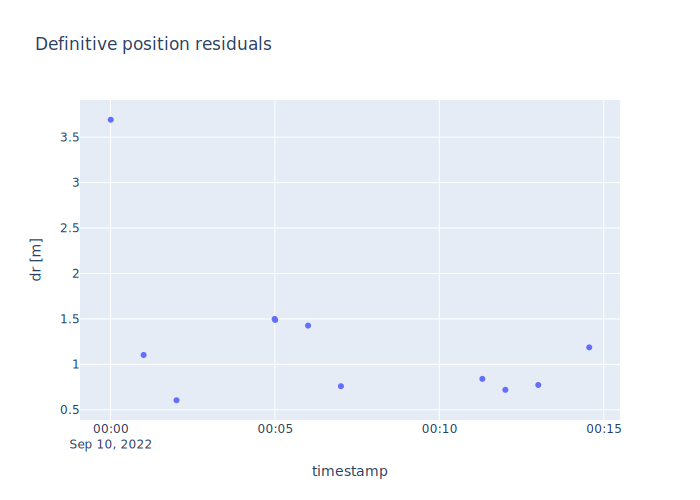

In [10]:
figure = px.scatter(data, x="timestamp", y="dr [m]", title="Definitive position residuals")
figure.show("svg")

---